<a href="https://colab.research.google.com/github/aganjasarthak/Beam_variable/blob/main/Copy_of_Simran_stha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install necessary libraries
!pip install openpyxl

# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Import required libraries
import pandas as pd

# Step 4: Set the path to your Excel file in Google Drive
file_path = '/content/drive/My Drive/data_export.xlsx'  # Adjust the path if necessary

# Step 5: Read the Excel file
data = pd.read_excel(file_path)

# Step 6: Separate features (X) and target (y)
# Assuming the first 7 columns are features and the 8th column is the target
X = data.iloc[:, :7]  # First 7 columns
y = data.iloc[:, 7]   # 8th column

# Step 7: Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Step 8: Optional - Display the first few rows of X and y
print("First few rows of X:")
print(X.head())
print("\nFirst few rows of y:")
print(y.head())




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of X: (1389, 7)
Shape of y: (1389,)
First few rows of X:
         x0        x1        x2        x3        x4        x5       x6
0 -1.654326 -1.560313  0.776833 -0.048721  1.153250 -1.224201  0.99928
1 -1.494174 -1.560313  1.819869 -1.569489  1.395235  1.078325 -1.00072
2 -1.334022 -1.560313  3.254043 -1.569489  2.443840  1.078325 -1.00072
3 -1.173870 -1.560313  2.080628 -0.682374  0.911264  1.078325  0.99928
4 -1.013718 -1.560313 -0.266203 -1.189297  1.072588  1.078325 -1.00072

First few rows of y:
0    0
1    1
2    1
3    1
4    0
Name: result, dtype: int64


            x0        x1        x2        x3        x4        x5       x6
0    -1.654326 -1.560313  0.776833 -0.048721  1.153250 -1.224201  0.99928
1    -1.494174 -1.560313  1.819869 -1.569489  1.395235  1.078325 -1.00072
2    -1.334022 -1.560313  3.254043 -1.569489  2.443840  1.078325 -1.00072
3    -1.173870 -1.560313  2.080628 -0.682374  0.911264  1.078325  0.99928
4    -1.013718 -1.560313 -0.266203 -1.189297  1.072588  1.078325 -1.00072
...        ...       ...       ...       ...       ...       ...      ...
1384 -1.654326  1.957212 -1.048480  0.838393 -1.266606 -1.224201  0.99928
1385 -0.212959  1.957212 -0.787721  0.965123  0.023984  1.078325 -1.00072
1386  0.107344  1.957212  0.385694 -0.048721 -0.943959 -1.224201  0.99928
1387  1.068255  1.957212 -0.657342  0.204740  0.023984 -0.072938  0.99928
1388 -0.533263  1.957212 -0.918101 -0.428913 -0.701973 -1.224201 -1.00072

[1389 rows x 7 columns]
0       0
1       1
2       1
3       1
4       0
       ..
1384    0
1385    0
1386   

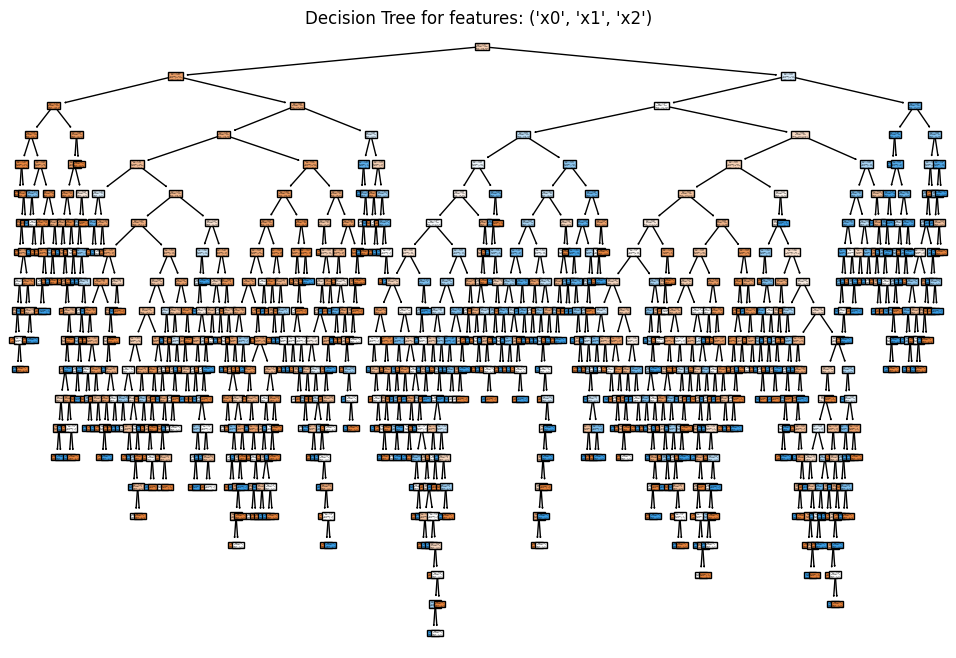

[0 1 1 ... 1 0 1]


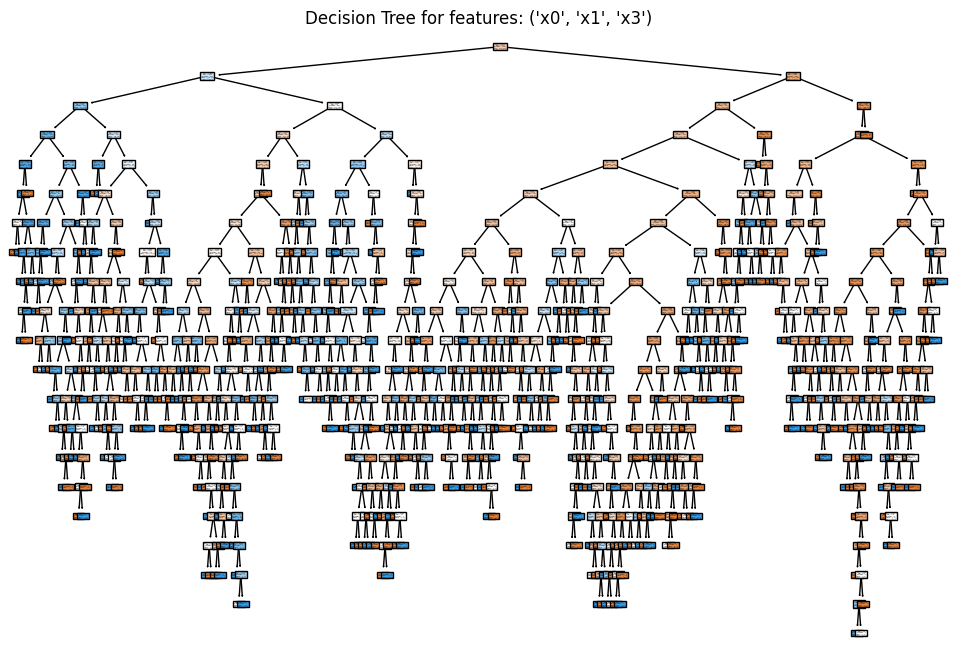

[0 1 1 ... 1 0 1]


KeyboardInterrupt: 

In [2]:
print(X)
from sklearn.tree import DecisionTreeClassifier as dt,plot_tree
dt=dt(max_depth=20)
dt.fit(X,y)
print(y)
print(dt.predict(X))

import itertools  as it
pairs=list(it.combinations(X.columns,3))
print(pairs)
all_preds=[]

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

for pair in pairs:
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=42
    )
  x_new=X[list(pair)]
  dt.fit(x_new,y)
  print(dt.predict(x_new))
  pred=dt.predict(x_new)

  all_preds.append(pred)

  # plt.figure(figsize=(12, 8))  # Set the figure size
  # plot_tree(dt, feature_names=list(pair), class_names=["Class 0", "Class 1"], filled=True)
  # plt.title(f"Decision Tree for features: {pair}")
  # plt.show()

all_preds=pd.DataFrame(all_preds).T
print(all_preds)

print("\nColumns from index 6 to 15:")
print(all_preds.iloc[:, 6:16])


all_preds['avg']=all_preds.mean(axis=1)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report

all_preds['avg'] = (all_preds['avg'] > 0.5).astype(int)

mse = mean_squared_error(y, all_preds['avg'])
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y, all_preds['avg'])
print(f"Mean Absolute Error: {mae}")

print(all_preds)

report = classification_report(y, all_preds['avg'], target_names=["Class 0", "Class 1"])

# Display the classification report
print("Detailed Classification Report:")
print(report)
